<a href="https://colab.research.google.com/github/ganel1113s/fyp/blob/main/CICIDS2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q flwr[simulation] flwr-datasets[vision] torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.6/523.6 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not current

In [2]:
!pip install -q fsspec==2024.10.1

ERROR: Ignored the following yanked versions: 2022.8.0, 2022.8.1
ERROR: Could not find a version that satisfies the requirement fsspec==2024.10.1 (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.5, 0.3.6, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.8.0, 0.8.1, 0.8.2, 0.8.3, 0.8.4, 0.8.5, 0.8.6, 0.8.7, 0.9.0, 2021.4.0, 2021.5.0, 2021.6.0, 2021.6.1, 2021.7.0, 2021.8.1, 2021.9.0, 2021.10.0, 2021.10.1, 2021.11.0, 2021.11.1, 2022.1.0, 2022.2.0, 2022.3.0, 2022.5.0, 2022.7.0, 2022.7.1, 2022.8.2, 2022.10.0, 2022.11.0, 2023.1.0, 2023.3.0, 2023.4.0, 2023.5.0, 2023.6.0, 2023.9.0, 2023.9.1, 2023.9.2, 2023.10.0, 2023.12.0, 2023.12.1, 2023.12.2, 2024.2.0, 2024.3.0, 2024.3.1, 2024.5.0, 2024.6.0, 2024.6.1, 2024.9.0, 2024.10.0, 2024.12.0)
ERROR: No matching distribution found for fsspec==2024.10.1


In [3]:
import flwr

In [4]:
import zipfile
import os

from collections import OrderedDict
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from datasets.utils.logging import disable_progress_bar
from torch.utils.data import DataLoader,Dataset

from flwr.client import Client, ClientApp, NumPyClient
from flwr.server import ServerApp, ServerConfig, ServerAppComponents
from flwr.server.strategy import FedAvg, FedAdagrad
from flwr.simulation import run_simulation,start_simulation
from flwr_datasets import FederatedDataset
from flwr.common import ndarrays_to_parameters, NDArrays, Scalar, Context,Metrics

import pandas as pd

DEVICE = torch.device("cuda")  # Try "cuda" to train on GPU
print(f"Training on {DEVICE}")
print(f"Flower {flwr.__version__} / PyTorch {torch.__version__}")
disable_progress_bar()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training on cuda
Flower 1.14.0 / PyTorch 2.5.1+cu121


In [5]:
data_path = r'/content/drive/MyDrive/FYP/CIC-DDoS-2017'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Dataset partition**

1. To compare with N-BaIoT for unsupervised autoencoder:  
Keep the chronological splitting  
Introduce non-IID by splitting by different folders --> collected at different time and with different attack types  
Balance normal and attack data in each client, check for data imbalance across clients  
2. To implement a tree-based FL and feature extraction carried by each local client  
Random sampling without considering chronological dependency

In [ ]:
data = []
for i, filename in enumerate(os.listdir(data_path)):
    if filename.endswith(".csv"):
      print(filename)
      # Read the CSV file
      file_path = os.path.join(data_path, filename)
      df = pd.read_csv(file_path)
      print(df[' Label'].value_counts())


Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64
Friday-WorkingHours-Morning.pcap_ISCX.csv
 Label
BENIGN    189067
Bot         1966
Name: count, dtype: int64
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
 Label
PortScan    158930
BENIGN      127537
Name: count, dtype: int64
Monday-WorkingHours.pcap_ISCX.csv
 Label
BENIGN    529918
Name: count, dtype: int64
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
 Label
BENIGN          288566
Infiltration        36
Name: count, dtype: int64
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
 Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64
Tuesday-WorkingHours.pcap_ISCX.csv
 Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64
Wednesday-workingHours.pcap_ISCX.csv
 Label
BENIGN        

In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [6]:
data = []
for i, filename in enumerate(os.listdir(data_path)):
    if filename.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path)
        # Remove nan and inf values
        df = df.dropna()
        df = df[~np.isinf(df[df.columns[:-1]]).any(axis=1)]
        df = df.rename(columns={' Label': 'Label'})
        print(df['Label'].unique())

        # Append to the list of DataFrames
        data.append(df)

# Concatenate all DataFrames
dataframe = pd.concat(data, ignore_index=True)

['BENIGN' 'DDoS']
['BENIGN' 'Bot']
['BENIGN' 'PortScan']
['BENIGN']
['BENIGN' 'Infiltration']
['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
['BENIGN' 'FTP-Patator' 'SSH-Patator']
['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [7]:
 dataframe.to_parquet('CICIDS2017.parquet',engine = 'pyarrow')

### **Group the dataset**
 According to https://doi.org/10.1007/s10922-024-09874-0

In [7]:
def replace_labels(value):
    if 'DoS' in value or 'Heartbleed' in value:
        return 'DoS'
    elif 'Patator' in value:
        return 'Bruteforce'
    elif 'Web' in value:
        return 'Web attack'
    return value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
dataframe['Label'] = dataframe['Label'].apply(replace_labels)

In [15]:
dataframe.Label.unique()

array(['BENIGN', 'DoS', 'Bot', 'PortScan', 'Infiltration', 'Web attack',
       'Bruteforce'], dtype=object)

In [16]:
for label in dataframe.Label.unique():
  print(f'{label}:{len(dataframe[dataframe.Label == label])}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BENIGN:2271320
DoS:379748
Bot:1956
PortScan:158804
Infiltration:36
Web attack:2180
Bruteforce:13832


Number of majority samples = Sum of Bot, PortScan, Infiltratioin, Web attack, Bruteforce * 4 = 707232

Benign:DoS = 6:1 <br>
Benign = 707232 * 6/7 = 606199 <br>
DoS = 707232 * 1/7 = 101033

In [9]:
# Predefined number of rows to undersample to
undersample_count = {'BENIGN':606199,'DoS':101033}

# Specify the two majority classes to undersample
majority_classes = ['BENIGN', 'DoS']

# Undersample the majority classes
dataframe_undersampled = []
for cls in majority_classes:
    sampled_df = dataframe[dataframe['Label'] == cls].sample(n=undersample_count[cls], random_state=42)
    dataframe_undersampled.append(sampled_df)

# Combine the undersampled majority classes with the other classes
remaining_classes = dataframe[~dataframe['Label'].isin(majority_classes)]
final_df = pd.concat(dataframe_undersampled + [remaining_classes], ignore_index=True)

# Shuffle the resulting DataFrame
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the resulting DataFrame
print(final_df['Label'].value_counts())


Label
BENIGN          606199
PortScan        158804
DoS             101033
Bruteforce       13832
Web attack        2180
Bot               1956
Infiltration        36
Name: count, dtype: int64


In [12]:
final_df.columns = [i.strip() for i in list(dataframe.columns)]

In [42]:
undersample_size = 300000

# Calculate the number of samples per class to maintain distribution
class_distribution = final_df['Label'].value_counts(normalize=True)  # Get the class proportions
samples_per_class = (class_distribution * undersample_size).round().astype(int)  # Calculate samples per class

# Perform undersampling
undersampled_dfs = []
for label, n_samples in samples_per_class.items():
    sampled_df = final_df[final_df['Label'] == label].sample(n=n_samples, random_state=42)  # Random sampling for each class
    undersampled_dfs.append(sampled_df)

# Combine undersampled classes into a new DataFrame
undersampled_df = pd.concat(undersampled_dfs, ignore_index=True)

# Display class distribution of the undersampled DataFrame
print("Original distribution:")
print(final_df['Label'].value_counts(normalize=True))
print("\nUndersampled distribution:")
print(undersampled_df['Label'].value_counts(normalize=True))

Original distribution:
Label
BENIGN          0.685714
PortScan        0.179634
DoS             0.114286
Bruteforce      0.015646
Web attack      0.002466
Bot             0.002213
Infiltration    0.000041
Name: proportion, dtype: float64

Undersampled distribution:
Label
BENIGN          0.685713
PortScan        0.179633
DoS             0.114287
Bruteforce      0.015647
Web attack      0.002467
Bot             0.002213
Infiltration    0.000040
Name: proportion, dtype: float64


In [44]:
undersampled_df.loc[undersampled_df['Label'] == 'Infiltration']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_Binary
299988,444,69714525,20,20,3737,120,705,6,186.850000,227.161032,...,5.575790e+05,1.131371e+01,557587,557571,34000000.0,29700000.0,55000000,13000000,Infiltration,True
299989,444,118573317,3733,3732,1827335,22392,1271,6,489.508438,269.610304,...,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0,0,Infiltration,True
299990,444,86726608,1775,1775,785275,10650,1274,6,442.408451,251.446955,...,2.310000e+07,2.610000e+07,41600000,4649995,17400000.0,16200000.0,28800000,5953706,Infiltration,True
299991,444,119974830,3398,3398,1645814,20643,1153,0,484.347852,302.057454,...,8.243630e+05,0.000000e+00,824363,824363,9785751.0,0.0,9785751,9785751,Infiltration,True
299992,444,48450959,7,8,1959,48,963,6,279.857143,369.463317,...,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0,0,Infiltration,True
299993,444,67917167,20,20,3738,120,705,6,186.900000,227.230210,...,5.664775e+05,1.173161e+04,574773,558182,33100000.0,30600000.0,54800000,11400000,Infiltration,True
299994,444,99912925,26,26,6674,156,1164,6,256.692308,366.020521,...,6.312257e+05,9.444297e+04,740279,576642,32500000.0,19500000.0,55000000,20900000,Infiltration,True
299995,444,119973135,4376,4374,2321478,26244,1273,6,530.502285,262.768815,...,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0,0,Infiltration,True
299996,444,24006815,35,35,13418,210,1460,6,383.371429,499.569408,...,4.963369e+06,0.000000e+00,4963369,4963369,18500000.0,0.0,18500000,18500000,Infiltration,True
299997,444,20,2,0,12,0,6,6,6.000000,0.000000,...,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0,0,Infiltration,True


In [13]:
final_df.to_parquet('CIC-DDOS-2017_reduced.parquet')

In [ ]:
final_df = pd.read_parquet('CIC-DDOS-2017_reduced.parquet')

In [14]:
final_df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [15]:
final_df['Label_Binary'] = final_df.apply(lambda row:row['Label'] != 'BENIGN', axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
final_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_Binary
0,53,132,2,2,64,96,32,32,32.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
1,2865,4,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
2,53,38506,2,2,96,344,48,48,48.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
3,45682,3,2,0,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
4,49460,1259,5,1,438,6,319,6,87.600000,131.974619,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884035,443,3970955,6,7,1057,394,517,0,176.166667,249.512658,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
884036,53,261,2,2,64,120,32,32,32.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
884037,53,48199,4,2,180,212,45,45,45.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,False
884038,80,95675737,4,5,408,11595,402,0,102.000000,200.019999,...,0.0,0.0,0,0,95500000.0,0.0,95500000,95500000,DoS,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset
from sklearn.decomposition import PCA

NUM_CLIENTS = 9
BATCH_SIZE = 32
ENABLE_PCA = False

def load_datasets(dataset,model_type:str,partition_id: int,label_col_num:int):
    partition = dataset.loc[dataset['Client_ID'] == partition_id]
    feature_columns = partition.columns[:-label_col_num]
    partition_train_test = {}
    if model_type == 'Autoencoder':
      # select normal data profile to train
      partition_benign = partition.loc[partition['Label_Binary']==0]
      #print(partition_benign.index)
      partition_attack = partition.loc[partition['Label_Binary']==1]
      print(len(partition_attack))
      partition_train_test['train'] = partition_benign.iloc[:int(0.39*len(partition_benign))-1]
      #print(partition_train_test['train'].index)
      #print(int(0.39*len(partition_benign))-1)
      partition_train_test['val'] = partition_benign.iloc[int(0.39*len(partition_benign)):int(0.78*len(partition_benign))]
      #print(len(partition_train_test['val']))
      #partition_train_test['test_benign'] = pd.concat([partition_benign.iloc[int(0.8*len(partition_benign)):],partition_attack.iloc[:len(partition_benign)]])
      partition_train_test['test_benign'] = partition_benign.iloc[int(0.8*len(partition_benign)):]
      #print(len(partition_train_test['test_benign']))
      partition_train_test['test_attack'] = partition_attack.iloc[:len(partition_benign)]
      #print(len(partition_train_test['test_attack']))
    scaler = MinMaxScaler()
    scaler.fit(partition_train_test['train'][feature_columns])
    X_train = torch.tensor(scaler.transform(partition_train_test['train'][feature_columns]))
    #print(f'train_max:{X_train.max()}')
    y_train = torch.tensor(partition_train_test['train']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_train = torch.tensor(pca.fit_transform(X_train.numpy()))
      '''
      explained_variance = pca.explained_variance_ratio_
      plt.figure(figsize=(10, 6))
      plt.bar(range(1, 51), explained_variance, alpha=0.7, color='blue', align='center')
      plt.xlabel('Principal Component')
      plt.ylabel('Explained Variance Ratio')
      plt.title('Explained Variance by Principal Component (Top 50)')
      plt.xticks(range(1, 51))
      plt.show()
      '''

    X_val = torch.tensor(scaler.transform(partition_train_test['val'][feature_columns]))
    y_val = torch.tensor(partition_train_test['val']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_val = torch.tensor(pca.fit_transform(X_val.numpy()))
    #print(f'val_max:{X_val.max()}')
    X_test_benign = torch.tensor(scaler.transform(partition_train_test['test_benign'][feature_columns]))
    y_test_benign = torch.tensor(partition_train_test['test_benign']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_test_benign = torch.tensor(pca.fit_transform(X_test_benign.numpy()))
    #print(f'benign_max:{X_test_benign.max()}')
    X_test_attack = torch.tensor(scaler.transform(partition_train_test['test_attack'][feature_columns]))
    y_test_attack = torch.tensor(partition_train_test['test_attack']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_test_attack = torch.tensor(pca.fit_transform(X_test_attack.numpy()))
    #print(f'attack_max:{X_test_attack.max()}')
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_benign_dataset = TensorDataset(X_test_benign, y_test_benign)
    test_attack_dataset = TensorDataset(X_test_attack, y_test_attack)
    trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
    valloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    benign_testloader = DataLoader(test_benign_dataset, batch_size=BATCH_SIZE)
    attack_testloader = DataLoader(test_attack_dataset, batch_size=BATCH_SIZE)
    return trainloader, valloader, benign_testloader, attack_testloader

In [51]:
from datasets import Dataset
from flwr_datasets.partitioner import DirichletPartitioner

dataset = Dataset.from_pandas(undersampled_df)

dirichlet_partitioner = DirichletPartitioner(
    num_partitions=9, alpha=0.6, partition_by="Label",min_partition_size=10000
)
dirichlet_partitioner.dataset = dataset
partition = dirichlet_partitioner.load_partition(partition_id=0)

In [25]:
from flwr_datasets.visualization import plot_label_distributions

/usr/local/lib/python3.10/dist-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(


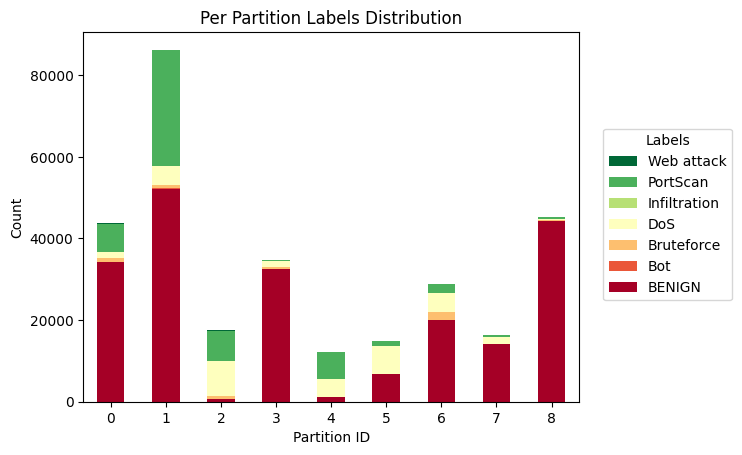

In [52]:
fig, ax, df = plot_label_distributions(
    dirichlet_partitioner,
    label_name="Label",
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution",
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset
from sklearn.decomposition import PCA

NUM_CLIENTS = 9
BATCH_SIZE = 32
ENABLE_PCA = False

def load_datasets(dataset,model_type:str,partition_id: int,label_col_num:int):
    partition = dirichlet_partitioner.load_partition(partition_id=0)
    feature_columns = partition.columns[:-label_col_num]
    partition_train_test = {}
    if model_type == 'Autoencoder':
      # select normal data profile to train
      partition_benign = partition.loc[partition['Label_Binary']==0]
      #print(partition_benign.index)
      partition_attack = partition.loc[partition['Label_Binary']==1]
      print(len(partition_attack))
      partition_train_test['train'] = partition_benign.iloc[:int(0.39*len(partition_benign))-1]
      #print(partition_train_test['train'].index)
      #print(int(0.39*len(partition_benign))-1)
      partition_train_test['val'] = partition_benign.iloc[int(0.39*len(partition_benign)):int(0.78*len(partition_benign))]
      #print(len(partition_train_test['val']))
      #partition_train_test['test_benign'] = pd.concat([partition_benign.iloc[int(0.8*len(partition_benign)):],partition_attack.iloc[:len(partition_benign)]])
      partition_train_test['test_benign'] = partition_benign.iloc[int(0.8*len(partition_benign)):]
      #print(len(partition_train_test['test_benign']))
      partition_train_test['test_attack'] = partition_attack.iloc[:len(partition_benign)]
      #print(len(partition_train_test['test_attack']))
    scaler = MinMaxScaler()
    scaler.fit(partition_train_test['train'][feature_columns])
    X_train = torch.tensor(scaler.transform(partition_train_test['train'][feature_columns]))
    #print(f'train_max:{X_train.max()}')
    y_train = torch.tensor(partition_train_test['train']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_train = torch.tensor(pca.fit_transform(X_train.numpy()))
      '''
      explained_variance = pca.explained_variance_ratio_
      plt.figure(figsize=(10, 6))
      plt.bar(range(1, 51), explained_variance, alpha=0.7, color='blue', align='center')
      plt.xlabel('Principal Component')
      plt.ylabel('Explained Variance Ratio')
      plt.title('Explained Variance by Principal Component (Top 50)')
      plt.xticks(range(1, 51))
      plt.show()
      '''

    X_val = torch.tensor(scaler.transform(partition_train_test['val'][feature_columns]))
    y_val = torch.tensor(partition_train_test['val']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_val = torch.tensor(pca.fit_transform(X_val.numpy()))
    #print(f'val_max:{X_val.max()}')
    X_test_benign = torch.tensor(scaler.transform(partition_train_test['test_benign'][feature_columns]))
    y_test_benign = torch.tensor(partition_train_test['test_benign']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_test_benign = torch.tensor(pca.fit_transform(X_test_benign.numpy()))
    #print(f'benign_max:{X_test_benign.max()}')
    X_test_attack = torch.tensor(scaler.transform(partition_train_test['test_attack'][feature_columns]))
    y_test_attack = torch.tensor(partition_train_test['test_attack']['Label_Binary'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_test_attack = torch.tensor(pca.fit_transform(X_test_attack.numpy()))
    #print(f'attack_max:{X_test_attack.max()}')
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_benign_dataset = TensorDataset(X_test_benign, y_test_benign)
    test_attack_dataset = TensorDataset(X_test_attack, y_test_attack)
    trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
    valloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    benign_testloader = DataLoader(test_benign_dataset, batch_size=BATCH_SIZE)
    attack_testloader = DataLoader(test_attack_dataset, batch_size=BATCH_SIZE)
    return trainloader, valloader, benign_testloader, attack_testloader

In [24]:
partition

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset({
    features: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, latent_size)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
class Autoencoder_4_layers(nn.Module):
    def __init__(self, layer_sizes):
        """
        Initialize the Autoencoder with custom layer sizes.

        Parameters
        ----------
        layer_sizes : list of int
            A list of four integers specifying the number of neurons in each layer.
            Example: [115, 87, 58, 29]
        """
        super(Autoencoder_4_layers, self).__init__()

        # Ensure we have exactly four layers specified
        assert len(layer_sizes) == 4, "layer_sizes should contain exactly four values."

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(layer_sizes[0], layer_sizes[1]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[1], layer_sizes[2]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[2], layer_sizes[3]),
            nn.ReLU(True)
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(layer_sizes[3], layer_sizes[2]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[2], layer_sizes[1]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[1], layer_sizes[0]),
            nn.Sigmoid()  # Using Sigmoid to keep the output in range (0, 1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Example usage
layer_sizes = [78, 58, 39, 19]
autoencoder = Autoencoder_4_layers(layer_sizes)
print(autoencoder)


Autoencoder_4_layers(
  (encoder): Sequential(
    (0): Linear(in_features=78, out_features=58, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=58, out_features=39, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=39, out_features=19, bias=True)
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=19, out_features=39, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=39, out_features=58, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=58, out_features=78, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

def train(net, trainloader, num_epochs: int, verbose=False):
    """Train the network on the training set."""
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters())
    net.train()
    for epoch in range(num_epochs):
        correct, total, epoch_loss = 0, 0, 0.0
        for batch in trainloader:
            inputs = batch[0].float()
            has_nan = torch.isnan(inputs).any()
            if has_nan:
              print(f"Contains NaN: {has_nan}")

            # Check for inf values
            has_inf = torch.isinf(inputs).any()
            if has_inf:
              print(f"Contains Inf: {has_inf}")

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = torch.sqrt(criterion(outputs, inputs))
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
        epoch_loss /= len(trainloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss.item():.4f}')
    return epoch_loss.item()


def validation(net,valloader):
  criterion = torch.nn.MSELoss(reduction = 'none')
  net.eval()
  total_loss = 0.0
  loss_history = []
  batch_num = 0
  unreducedLoss_list = []
  with torch.no_grad():
    for batch in valloader:
      batch_num += 1
      inputs = batch[0].float()
      has_nan = torch.isnan(inputs).any()
      if has_nan:
        print(f"Contains NaN: {has_nan}")

      # Check for inf values
      has_inf = torch.isinf(inputs).any()
      if has_inf:
        print(f"Contains Inf: {has_inf}")
      outputs = net(inputs)
      # Raw loss with dimension 32*115
      unreducedLoss = criterion(outputs, inputs)
      unreducedLoss_list.append(unreducedLoss)
      # Raw loss reduced by the second dimension, mean of squared difference
      loss = torch.sqrt(unreducedLoss.mean(dim=1))
      '''
      if loss.sum().item() > 288:
        #print(inputs)
        print(batch_num)
        print(outputs)
        print(loss)
      '''
      total_loss += loss.sum().item()
      loss_history.extend(loss.tolist())
  total_loss/=len(valloader.dataset)
  unreducedLoss_array = np.concatenate([tensor.numpy() for tensor in unreducedLoss_list], axis=0)
  return total_loss,loss_history,unreducedLoss_array


def test(net, testloader,threshold):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.MSELoss(reduction = 'none')
    loss_distribution = []
    unreducedLoss_list = []
    net.eval()
    count_exceed_threshold,count_total,total_loss = 0.0,0.0,0.0
    #print(f'total_size:{len(testloader.dataset)}')
    with torch.no_grad():
        for batch in testloader:
            inputs, labels = [t.float() for t in batch]
            has_nan = torch.isnan(inputs).any()
            if has_nan:
              print(f"Contains NaN: {has_nan}")

            # Check for inf values
            has_inf = torch.isinf(inputs).any()
            if has_inf:
              print(f"Contains Inf: {has_inf}")
            outputs = net(inputs.float())
            # Raw loss with dimension 32*115
            unreducedLoss = criterion(outputs, inputs)
            unreducedLoss_list.append(unreducedLoss)
            # Raw loss reduced by the second dimension, mean of squared difference
            loss = torch.sqrt(unreducedLoss.mean(dim=1))
            #print(f'loss_dtype:{loss.dtype}')
            if torch.isinf(loss).any():
              print(inputs.dtype)
              inf_indices = torch.nonzero(torch.isinf(loss), as_tuple=False)
              print(f'index:{inf_indices}')
              print(f'inputs:{inputs[inf_indices]}')
              print(f'outputs:{outputs[inf_indices]}')
              print(f'loss:{loss}')
              for i in inf_indices:
                input,output = inputs[i],outputs[i]
                print(f'dimension:{input.shape}')
                SE = (output-input)**2
                print(f'SE:{SE}')
                inf_index = torch.nonzero(torch.isinf(SE), as_tuple=False)
                print(f'SE_inf_input:{input[:,inf_index]}')
                print(f'SE_inf_output:{output[:,inf_index]}')
                custom_MSE = torch.mean((output-input)**2)
                print(f'MSE:{custom_MSE}')
                print(f'RMSE:{torch.sqrt(custom_MSE)}')
            #print(f'shape of loss:{loss.shape}')
            #print(loss)
            ## find outlier in reconstruction loss from predefined threshold
            if threshold:
              count_exceed_threshold += (loss > threshold).sum().item()
            count_total += len(loss)
            total_loss += loss.sum().item()
            #print(f'total_loss_dtype:{total_loss.type()}')
            #print(loss.tolist())
            #print(f'loss:{loss}')
            #print(f'total_loss:{total_loss}')
            #print(loss.mean())
            loss_distribution.extend(loss.tolist())
            #total_loss += loss.item()
    exceed_threshold_proportion = count_exceed_threshold/count_total
    #print(f'number of loss:{len(loss_history)}')
    print(f'exceed threshold proportion:{exceed_threshold_proportion}')
    print(f'count_total:{count_total}')
    total_loss /= count_total
    unreducedLoss_array = np.concatenate([tensor.numpy() for tensor in unreducedLoss_list], axis=0)
    return total_loss,loss_distribution, exceed_threshold_proportion,unreducedLoss_array

In [ ]:
def set_parameters(net, parameters: List[np.ndarray]):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)


def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]

In [ ]:
## The first step toward creating a ClientApp is to implement a subclasses of flwr.client.Client or flwr.client.NumPyClient.
## We use NumPyClient in this tutorial because it is easier to implement and requires us to write less boilerplate.
class FlowerClient_Train(NumPyClient):
    def __init__(self, net, partition_id,trainloader, valloader, benign_testloader, attack_testloader,context:Context):
        self.client_state = (
            context.state
        )
        #if "eval_metrics" not in self.client_state.configs_records:
            #.client_state.configs_records["eval_metrics"] = ConfigsRecord()
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.benign_testloader = benign_testloader
        self.attack_testloader = attack_testloader
        self.partition_id = partition_id
        #print(self.client_state.configs_records)

    def get_parameters(self, config):
        return get_parameters(self.net)
    ## Training
    def fit(self, parameters, config):
      print(f"[Client {self.partition_id}] fit, config: {config}")
      set_parameters(self.net, parameters)
      #eval_metrics = self.client_state.configs_records["eval_metrics"]
      local_epoch = 4
      '''
      if 'local_epoch' not in eval_metrics:
        local_epoch = 4
        eval_metrics["local_epoch"] = [4]
      else:
        local_epoch = eval_metrics['local_epoch'][-1]
      '''
      loss = train(self.net, self.trainloader, num_epochs=local_epoch)
      return get_parameters(self.net), len(self.trainloader), {'train_loss':loss,'config':local_epoch}
    ## Validation on subset of benign data to select threshold
    def evaluate(self, parameters, config):
      print(f"[Client {self.partition_id}] evaluate, config: {config}")
      set_parameters(self.net, parameters)
      loss,val_loss_history,valid_unreduced_loss = validation(self.net,self.valloader)
      val_loss_history = np.array(val_loss_history)
      ## calculate threshold based on MAD to make it more robust to outliers in normal data
      '''
      median = np.median(val_loss_history)
      MAD = np.median(np.abs(val_loss_history - median))
      threshold = median +10*MAD
      '''
      ## calculate threshold based on standard deviation after filtering out the outliers with IQR
      q1 = np.percentile(val_loss_history, 25)
      q3 = np.percentile(val_loss_history, 75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      val_loss_history_filtered = val_loss_history[(val_loss_history >= lower_bound) & (val_loss_history <= upper_bound)]
      #print(f'original loss:{len(loss_history)}')
      #print(f'filtered loss:{len(loss_history_filtered)}')
      mean = np.mean(val_loss_history_filtered)
      std = np.std(val_loss_history_filtered)
      threshold = mean + 2*std
      '''
      # train a linear one class SVM to find anomalous data
      svm = OneClassSVM(kernel='linear', nu=0.5)
      svm.fit(val_loss_history_filtered.reshape(-1, 1))
      #outlier_scores = svm.decision_function(val_loss_history.reshape(-1, 1))
      # save the one-class svm model fit on the local validation set
      joblib.dump(svm, f'svm_model_{self.partition_id}.pkl')
      # train an isolation forest to find anomalous data
      #model = IsolationForest(contamination=0.1, random_state=42)

      eval_metrics = self.client_state.configs_records["eval_metrics"]
      if 'local_epoch' not in eval_metrics:
        eval_metrics["local_epoch"] = [4]
      if "threshold" not in eval_metrics:
        eval_metrics["threshold"] = [threshold]
      else:
        eval_metrics["threshold"].append(threshold)
      if threshold > eval_metrics['threshold'][-1]:
        eval_metrics['local_epoch'].append(8)
      else:
        eval_metrics['local_epoch'].append(4)
      print(f'mean_valid_loss:{np.mean(val_loss_history)}')
      '''
      return float(loss), len(self.valloader), {'Client':self.partition_id,'validation_loss':loss,'validation_threshold':threshold}

In [ ]:
def client_fn_train(context: Context) -> Client:
    """Create a Flower client representing a single organization."""

    # Load model
    #net = Autoencoder(115,58,29).to(DEVICE)
    net = Autoencoder(78,39,19)
    #net = Autoencoder_4_layers(layer_sizes)
    #net = Autoencoder_2_layers(35,15)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data partition
    # Read the node_config to fetch data partition associated to this node
    # The value of partition-id is retrieved from the node_config dictionary in the Context object, which holds the information that persists throughout each training round.
    partition_id = int(context.node_config["partition-id"])
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(dataframe, 'Autoencoder',partition_id=partition_id,label_col_num = 3)

    # Create a single Flower client representing a single organization
    # FlowerClient is a subclass of NumPyClient, so we need to call .to_client()
    # to convert it to a subclass of `flwr.client.Client`
    return FlowerClient_Train(net, partition_id,trainloader, valloader,benign_testloader,attack_testloader,context).to_client()


# Create the ClientApp
client = ClientApp(client_fn=client_fn_train)

In [ ]:
## Select the max loss from validation dataset as the threshold
def max_loss(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  client_valid_loss = [m['validation_loss'] for _,m in metrics]
  print(client_valid_loss)
  client_max_loss = client_valid_loss.index(max(client_valid_loss))
  return {'max_loss':max(client_valid_loss),'client_max_loss':client_max_loss}

In [ ]:
def threshold_selection(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  client_valid_threshold = [m['validation_threshold'] for _,m in metrics]
  client_id = [m['Client'] for _,m in metrics]
  for id,threshold in zip(client_id,client_valid_threshold):
    print(f'Client {id} threshold: {threshold}')
  sorted_data = sorted(zip(client_id, client_valid_threshold), key=lambda x: x[0])
  sorted_client_id, sorted_client_valid_threshold = zip(*sorted_data)
  aggregate_threshold_mean = np.mean(client_valid_threshold)
  aggregate_threshold_std = np.std(client_valid_threshold)
  return {'aggregate_threshold_mean':aggregate_threshold_mean,'aggregate_threshold_std':aggregate_threshold_std,'client_thresholds':sorted_client_valid_threshold}

In [ ]:
## Return average training loss
def average_loss(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  client_train_loss = [m['train_loss'] for num_examples,m in metrics]
  client_config = [m['config'] for num_examples,m in metrics]
  print(client_train_loss)
  print(client_config)
  return {'train_loss':sum(client_train_loss)/len(client_train_loss)}

In [ ]:
global_model_trained = Autoencoder(78,39,19)

In [ ]:
from typing import Union, Optional, Dict
from flwr.server.client_proxy import ClientProxy
from flwr.common import FitRes,Parameters, FitIns, EvaluateRes
from flwr.server.client_manager import ClientManager
from flwr.server.strategy import FedAdam

class SaveModelStrategy(FedAdam):
    def __init__(self,
                 *,
                 patience:int,
                 **kwargs):
       super().__init__(**kwargs)
       self.best_eval_thres = float('inf')
       self.server_rounds_without_improvement = 0
       self.patience = patience
       self.current_model_params = None
       self.update_params = False
       self.previous_client_threshold = {key: None for key in range(9)}
       self.client_update_lst = []

    def aggregate_fit(
        self,
        server_round: int,
        results: List[Tuple[flwr.server.client_proxy.ClientProxy, flwr.common.FitRes]],
        failures: List[Union[Tuple[ClientProxy, FitRes], BaseException]],
    ) -> Tuple[Optional[Parameters], Dict[str, Scalar]]:
        """Aggregate model weights using weighted average and store checkpoint"""

        # Call aggregate_fit from base class (FedAvg) to aggregate parameters and metrics
        aggregated_parameters, aggregated_metrics = super().aggregate_fit(
            server_round, results, failures
        )

        if aggregated_parameters is not None:
          aggregated_ndarrays: List[np.ndarray] = flwr.common.parameters_to_ndarrays(
                aggregated_parameters
            )
          self.current_model_params = aggregated_ndarrays

        return aggregated_parameters, aggregated_metrics

    def aggregate_evaluate(
        self,
        server_round: int,
        results: list[tuple[ClientProxy, EvaluateRes]],
        failures: list[Union[tuple[ClientProxy, EvaluateRes], BaseException]],
    ) -> tuple[Optional[float], dict[str, Scalar]]:

        loss_aggregated, metrics_aggregated = super().aggregate_evaluate(server_round, results, failures)
        # Get current highest threshold on the client-side validation set
        current_eval_thres = metrics_aggregated['aggregate_threshold_mean']

        client_thresholds = metrics_aggregated['client_thresholds']
        self.client_update_lst = []
        for i in range(len(client_thresholds)):
          if self.previous_client_threshold[i] is not None:
            if client_thresholds[i] > self.previous_client_threshold[i]:
              self.client_update_lst.append(i)
          self.previous_client_threshold[i] = client_thresholds[i]
        #print(self.client_update_lst)

        if current_eval_thres < self.best_eval_thres:
          self.server_rounds_without_improvement = 0
          # Update the best threshold
          self.best_eval_thres = current_eval_thres
          self.update_params = True
          print('Lowest validation threshold updated')
          # Save the model if the threshold is the lowest
          params_dict = zip(global_model_trained.state_dict().keys(), self.current_model_params)
          state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
          global_model_trained.load_state_dict(state_dict, strict=True)
          print(f'Saving model at round {server_round}')
          torch.save(global_model_trained.state_dict(), f"model_round_{server_round}.pth")
        else:
          self.server_rounds_without_improvement += 1
          self.update_parms = False
          print(f"No improvement in validation loss for {self.server_rounds_without_improvement} round(s)")
        if self.server_rounds_without_improvement >= self.patience:
          print(f"Early stopping triggered at round {server_round}")

        return loss_aggregated, metrics_aggregated







In [ ]:
state_dict_ndarrays = [v.cpu().numpy() for v in global_model_trained.state_dict().values()]
initial_parameters = flwr.common.ndarrays_to_parameters(state_dict_ndarrays)

In [ ]:
NUM_CLIENTS = 7

In [ ]:
strategy = SaveModelStrategy(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=1,
        min_evaluate_clients=1,
        min_available_clients=7,
        initial_parameters = initial_parameters,
        evaluate_metrics_aggregation_fn=threshold_selection,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=average_loss,
        patience = 15,
        eta = 0.0008,
        eta_l = 0.001
        #**best_params
    )

history_train = flwr.simulation.start_simulation(
        client_fn=client_fn_train,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=50
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=50, no round_timeout
2024-12-03 13:47:46,415	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 7959099803.0, 'object_store_memory': 3979549900.0, 'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineAct

(ClientAppActor pid=75191) 1956
(ClientAppActor pid=75191) [Client 1] fit, config: {}
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.3969
(ClientAppActor pid=75191) 2000 [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) Epoch [2/4], Train Loss: 0.1339 [repeated 18x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.12074251472949982, 0.12041743844747543, 0.12355350703001022, 0.11412271112203598, 0.1427188664674759, 0.14900246262550354, 0.13418878614902496]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) 2000 [repeated 4x across cluster]
(ClientAppActor pid=75190) [Client 3] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 6] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.5032906305370078
Client 6 threshold: 0.5106438063106832
Client 4 threshold: 0.513372608689718
Client 0 threshold: 0.5053243871650295
Client 3 threshold: 0.5040551525288053
Client 5 threshold: 0.5173260204878587
Client 1 threshold: 0.5025743560311272
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1292 [repeated 14x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.12065800279378891, 0.13916225731372833, 0.12006247043609619, 0.14863285422325134, 0.113656185567379, 0.1437372863292694, 0.12221881747245789]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.5168871072298954
Client 4 threshold: 0.5129661184541114
Client 6 threshold: 0.5101696690212282
Client 3 threshold: 0.5036092342264464
Client 2 threshold: 0.5028183028915164
Client 0 threshold: 0.5048760275087794
Client 1 threshold: 0.5021486880065339
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1437 [repeated 23x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 3] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1199 [repeated 23x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11986254155635834, 0.12143967300653458, 0.14818502962589264, 0.11882296204566956, 0.1358741819858551, 0.1373806744813919, 0.11338627338409424]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 6] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 4 threshold: 0.5124713668083155
Client 1 threshold: 0.5016381921586851
Client 3 threshold: 0.5031301717317106
Client 5 threshold: 0.5164147760493831
Client 0 threshold: 0.5043766959940367
Client 2 threshold: 0.5023125802921486
Client 6 threshold: 0.5096618713754814
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=75190) Epoch [3/4], Train Loss: 0.1169 [repeated 10x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 1] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {}


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1300194412469864, 0.13340657949447632, 0.11787679046392441, 0.14721447229385376, 0.1183132752776146, 0.11253659427165985, 0.11800764501094818]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) [Client 1] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1334 [repeated 23x across cluster]
Client 5 threshold: 0.5158999131315146
Client 4 threshold: 0.5119252511256027
Client 2 threshold: 0.5017841006589477
Client 0 threshold: 0.503855686336813
Client 3 threshold: 0.5026041479035324
Client 1 threshold: 0.5011305831992653
Client 6 threshold: 0.5090335817365484
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=75191) 36 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 5] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) Epoch [2/4], Train Loss: 0.1508 [repeated 26x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1186172291636467, 0.11788564175367355, 0.1255752295255661, 0.13493983447551727, 0.14742513000965118, 0.1109316274523735, 0.11685770750045776]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.5012378051814211
Client 1 threshold: 0.5005286864817918
Client 0 threshold: 0.5033005836275153
Client 6 threshold: 0.5084858933971023
Client 3 threshold: 0.5020865353486013
Client 5 threshold: 0.5153694686957562
Client 4 threshold: 0.5113089393668668
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=75191) 2000 [repeated 11x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 2] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1254 [repeated 9x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 2] fit, config: {} [repeated 4x across cluster]
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1338 [repeated 12x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14735864102840424, 0.10900626331567764, 0.12542350590229034, 0.1462763249874115, 0.11745652556419373, 0.11644984781742096, 0.11760584264993668]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) 2000 [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 3] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.5079229979952637
Client 1 threshold: 0.500013730214584
Client 5 threshold: 0.5148246356643605
Client 2 threshold: 0.5006763708236389
Client 4 threshold: 0.5107023828056134
Client 0 threshold: 0.502766697424347
Client 3 threshold: 0.5015540187928355
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=75190) Epoch [3/4], Train Loss: 0.1244 [repeated 14x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75191) [Client 4] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 2] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14353305101394653, 0.1162511333823204, 0.12528495490550995, 0.11731217056512833, 0.10864877700805664, 0.11759331077337265, 0.14778737723827362]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1086 [repeated 23x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.5009816815860885
Client 4 threshold: 0.5101062976842319
Client 2 threshold: 0.500081078246144
Client 0 threshold: 0.5022007613086833
Client 6 threshold: 0.5073456555719447
Client 5 threshold: 0.514266634060711
Client 1 threshold: 0.49945873451575223
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=75190) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 4] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 0] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1139 [repeated 14x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 4x across cluster]
(ClientAppActor pid=75191) [Client 6] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11763420701026917, 0.14332741498947144, 0.1082414910197258, 0.11541721969842911, 0.13038639724254608, 0.1479647159576416, 0.1177966520190239]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 4 threshold: 0.5094951822393087
Client 3 threshold: 0.500394722601524
Client 1 threshold: 0.4989633922579733
Client 0 threshold: 0.5016564814745959
Client 2 threshold: 0.49952820124813196
Client 5 threshold: 0.5136922751413364
Client 6 threshold: 0.5067541749376172
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.3745 [repeated 15x across cluster]
(ClientAppActor pid=75191) 1956 [repeated 13x across cluster]
(ClientAppActor pid=75191) [Client 1] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14340201020240784, 0.14799994230270386, 0.1079448014497757, 0.13120678067207336, 0.1176319271326065, 0.11718292534351349, 0.11513833701610565]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1312 [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.4998668669053023
Client 5 threshold: 0.5130998356324088
Client 1 threshold: 0.4983525955003294
Client 4 threshold: 0.5088683132049241
Client 2 threshold: 0.49892039356146256
Client 0 threshold: 0.5010604470217466
Client 6 threshold: 0.5061472837718002
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75191) [Client 6] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.3519 [repeated 18x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 3x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11562218517065048, 0.12748399376869202, 0.11708731204271317, 0.13353274762630463, 0.11682503670454025, 0.10786076635122299, 0.14814816415309906]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.49829456579610165
Client 3 threshold: 0.4992462925322642
Client 6 threshold: 0.5055228540791364
Client 0 threshold: 0.5004474064253177
Client 4 threshold: 0.5081995354591045
Client 5 threshold: 0.5124883073036139
Client 1 threshold: 0.49767511929553593
Lowest validation threshold updated
Saving model at round 10
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.3308 [repeated 12x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75191) [Client 6] evaluate, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10775525867938995, 0.13984324038028717, 0.11691344529390335, 0.14809252321720123, 0.11554020643234253, 0.11751145124435425, 0.12698379158973694]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1481 [repeated 26x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.5048790196961208
Client 3 threshold: 0.4986077511824233
Client 4 threshold: 0.5075914531510427
Client 5 threshold: 0.5118574535084209
Client 2 threshold: 0.4976505703991182
Client 0 threshold: 0.4998131450449031
Client 1 threshold: 0.49702986406817284
Lowest validation threshold updated
Saving model at round 11
(ClientAppActor pid=75190) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 6] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 1] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [3/4], Train Loss: 0.1241 [repeated 22x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14848759770393372, 0.11529862135648727, 0.11685175448656082, 0.11569032073020935, 0.10766028612852097, 0.14289197325706482, 0.1235714852809906]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) 2000 [repeated 6x across cluster]
(ClientAppActor pid=75191) [Client 5] fit, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.4978259591356111
Client 0 threshold: 0.49911211542889466
Client 6 threshold: 0.50421552858342
Client 4 threshold: 0.5069656537630892
Client 5 threshold: 0.5112306483815832
Client 2 threshold: 0.4969869757420558
Client 1 threshold: 0.49636690506810127
Lowest validation threshold updated
Saving model at round 12
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1129 [repeated 11x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 6] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11734720319509506, 0.10777509212493896, 0.11550313234329224, 0.11635930836200714, 0.12153279036283493, 0.14409175515174866, 0.14891649782657623]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 1] evaluate, config: {}
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1164 [repeated 23x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 14]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.4962835407490286
Client 3 threshold: 0.4969499701048456
Client 4 threshold: 0.5063214864401062
Client 1 threshold: 0.4957108432052748
Client 0 threshold: 0.4984364329732715
Client 6 threshold: 0.5035302504387507
Client 5 threshold: 0.510558787777104
Lowest validation threshold updated
Saving model at round 13
(ClientAppActor pid=75190) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 6] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) Epoch [3/4], Train Loss: 0.1239 [repeated 22x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11797170341014862, 0.11513590067625046, 0.1163051575422287, 0.10763270407915115, 0.14906354248523712, 0.14153559505939484, 0.11906145513057709]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 15]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.5098630838267537
Client 3 threshold: 0.4961807442078238
Client 1 threshold: 0.49493422078481136
Client 0 threshold: 0.49773970607915036
Client 6 threshold: 0.5028182413605613
Client 2 threshold: 0.49557941363845925
Client 4 threshold: 0.5056077836100228
Lowest validation threshold updated
Saving model at round 14
(ClientAppActor pid=75191) [Client 2] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1491 [repeated 13x across cluster]
(ClientAppActor pid=75190) 36 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 3] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1376 [repeated 20x across cluster]
[0.12339252233505249, 0.14910480380058289, 0.11526686698198318, 0.10772400349378586, 0.1151469349861145, 0.1179669201374054, 0.1428479701280594]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 0] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 0 threshold: 0.4970247734647037
Client 6 threshold: 0.5020778601740886
Client 3 threshold: 0.49532327842033225
Client 4 threshold: 0.5048700171695486
Client 2 threshold: 0.4948530287734044
Client 1 threshold: 0.49423824016561896
Client 5 threshold: 0.5091380150416476
Lowest validation threshold updated
Saving model at round 15
(ClientAppActor pid=75190) 1956 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 1] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1126 [repeated 22x across cluster]
(ClientAppActor pid=75191) [Client 2] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10768482089042664, 0.11493540555238724, 0.11534836888313293, 0.14927077293395996, 0.11515814810991287, 0.13536593317985535, 0.11768944561481476]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) 2000 [repeated 6x across cluster]
(ClientAppActor pid=75191) [Client 5] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.4945831883833074
Client 0 threshold: 0.49628963610268056
Client 2 threshold: 0.49415882248024257
Client 4 threshold: 0.5041087565835612
Client 6 threshold: 0.5013088001122937
Client 5 threshold: 0.5083853182165973
Client 1 threshold: 0.4934701653803142
Lowest validation threshold updated
Saving model at round 16
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.3127 [repeated 17x across cluster]
(ClientAppActor pid=75191) [Client 5] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75190) [Client 6] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures


(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1557 [repeated 17x across cluster]


INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11508861929178238, 0.10764863342046738, 0.13887442648410797, 0.11531954258680344, 0.14943519234657288, 0.11749223619699478, 0.11486556380987167]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 0] evaluate, config: {}
(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 1 threshold: 0.49272621006704453
Client 6 threshold: 0.500511451379433
Client 3 threshold: 0.4937485592787349
Client 5 threshold: 0.5076021546569763
Client 0 threshold: 0.49552924138118565
Client 2 threshold: 0.4933788790050397
Client 4 threshold: 0.503247433382224
Lowest validation threshold updated
Saving model at round 17
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1676 [repeated 20x across cluster]
(ClientAppActor pid=75191) [Client 2] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 9x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 7x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11749481409788132, 0.1074976921081543, 0.1492598056793213, 0.11458724737167358, 0.11549287289381027, 0.1148291677236557, 0.1426728069782257]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 0 threshold: 0.49470522053916466
Client 1 threshold: 0.49197883155575334
Client 5 threshold: 0.506784203276158
Client 2 threshold: 0.4925728419284404
Client 6 threshold: 0.4996847760445294
Client 3 threshold: 0.4929790628393934
Client 4 threshold: 0.5024318167258518
Lowest validation threshold updated
Saving model at round 18
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1363 [repeated 22x across cluster]
(ClientAppActor pid=75191) [Client 1] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 6] fit, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11819033324718475, 0.11702611297369003, 0.11517053097486496, 0.10758625715970993, 0.11442692577838898, 0.14905044436454773, 0.14639997482299805]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1144 [repeated 15x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 1 threshold: 0.49115189021242583
Client 4 threshold: 0.5015665363084583
Client 0 threshold: 0.49388768591837223
Client 3 threshold: 0.4922738243379456
Client 6 threshold: 0.4988266071419595
Client 5 threshold: 0.5059300859832473
Client 2 threshold: 0.49173850076968456
Lowest validation threshold updated
Saving model at round 19
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1137 [repeated 16x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10746866464614868, 0.14631718397140503, 0.11685917526483536, 0.11398439854383469, 0.14842413365840912, 0.11366996169090271, 0.11494468152523041]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) [Client 5] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 21]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.5050382782853159
Client 6 threshold: 0.4979311521941778
Client 4 threshold: 0.5006450792683013
Client 1 threshold: 0.49029756079439085
Client 0 threshold: 0.49302665453271755
Client 3 threshold: 0.4914656500352167
Client 2 threshold: 0.49087146175897384
Lowest validation threshold updated
Saving model at round 20
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.3119 [repeated 22x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14823567867279053, 0.11451036483049393, 0.11687944084405899, 0.11369750648736954, 0.14400914311408997, 0.10743200778961182, 0.11565735191106796]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 22]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.4969908020187743
Client 5 threshold: 0.5041325269178438
Client 1 threshold: 0.48941394739670974
Client 3 threshold: 0.4906442322069485
Client 2 threshold: 0.48998857739016083
Client 4 threshold: 0.49974089880220846
Client 0 threshold: 0.4921545631959445
Lowest validation threshold updated
Saving model at round 21
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.3072 [repeated 19x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2975 [repeated 16x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 4x across cluster]
(ClientAppActor pid=75191) [Client 6] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1136440858244896, 0.14793048799037933, 0.11769377440214157, 0.11364277452230453, 0.10744492709636688, 0.13985687494277954, 0.11344975978136063]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) [Client 2] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 23]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 1 threshold: 0.48849845134622527
Client 3 threshold: 0.48978464705455055
Client 4 threshold: 0.4987999750525453
Client 5 threshold: 0.5031447529310463
Client 2 threshold: 0.4890323630470946
Client 0 threshold: 0.49113666194494005
Client 6 threshold: 0.4959626129418982
Lowest validation threshold updated
Saving model at round 22
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1135 [repeated 19x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75191) [Client 4] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 1] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11364017426967621, 0.14203420281410217, 0.10735142230987549, 0.14756228029727936, 0.11353360116481781, 0.11612191796302795, 0.11745263636112213]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 24]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.48893233311086265
Client 5 threshold: 0.5021043396545986
Client 2 threshold: 0.488060827580534
Client 1 threshold: 0.4875262211523898
Client 6 threshold: 0.49492992200188696
Client 0 threshold: 0.4902057703023516
Client 4 threshold: 0.49779714138117614
Lowest validation threshold updated
Saving model at round 23
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.2905 [repeated 21x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75191) [Client 5] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [2/4], Train Loss: 0.1300 [repeated 19x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 4x across cluster]
(ClientAppActor pid=75191) [Client 6] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14694547653198242, 0.10731839388608932, 0.11338108777999878, 0.11391579359769821, 0.11658203601837158, 0.11762693524360657, 0.1420944482088089]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 5] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 25]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.48701447815286014
Client 6 threshold: 0.49374782502575937
Client 3 threshold: 0.4880649800328141
Client 5 threshold: 0.5010094726550907
Client 1 threshold: 0.4865199898673979
Client 0 threshold: 0.48921718906719996
Client 4 threshold: 0.4967821849067361
Lowest validation threshold updated
Saving model at round 24
(ClientAppActor pid=75190) Epoch [2/4], Train Loss: 0.1665 [repeated 11x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 11x across cluster]
(ClientAppActor pid=75190) [Client 0] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 1] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14134645462036133, 0.1132211834192276, 0.14652664959430695, 0.11374358832836151, 0.11710139364004135, 0.10721632093191147, 0.1175055280327797]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1137 [repeated 25x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 26]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 0 threshold: 0.48820286369388666
Client 6 threshold: 0.49259406254836413
Client 1 threshold: 0.48554699843561006
Client 5 threshold: 0.49984189980469784
Client 2 threshold: 0.4858610000999828
Client 3 threshold: 0.4872931285516016
Client 4 threshold: 0.4957481418751162
Lowest validation threshold updated
Saving model at round 25
(ClientAppActor pid=75191) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 3] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 1] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [3/4], Train Loss: 0.1351 [repeated 22x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10720357298851013, 0.11243182420730591, 0.1173836886882782, 0.11256635189056396, 0.13970795273780823, 0.1167755275964737, 0.14603103697299957]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) 2000 [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 4x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 27]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.4846765206183038
Client 4 threshold: 0.4946201099364761
Client 3 threshold: 0.4863697835524202
Client 0 threshold: 0.48719313317194674
Client 6 threshold: 0.49137054101717914
Client 1 threshold: 0.48447897969759013
Client 5 threshold: 0.49860783268872344
Lowest validation threshold updated
Saving model at round 26
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1215 [repeated 11x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 11x across cluster]
(ClientAppActor pid=75190) [Client 0] fit, config: {} [repeated 4x across cluster]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {} [repeated 3x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11499783396720886, 0.1458446979522705, 0.13801780343055725, 0.11243880540132523, 0.11224249005317688, 0.11713016033172607, 0.10717256367206573]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 28]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1072 [repeated 23x across cluster]
Client 6 threshold: 0.49002538526243883
Client 1 threshold: 0.4834001246875693
Client 0 threshold: 0.4861624397155779
Client 2 threshold: 0.483497106544995
Client 5 threshold: 0.4973168971900167
Client 4 threshold: 0.4934606791510929
Client 3 threshold: 0.48525576446494834
Lowest validation threshold updated
Saving model at round 27
(ClientAppActor pid=75190) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 0] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1070 [repeated 24x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11449827998876572, 0.11721938103437424, 0.13919208943843842, 0.10695042461156845, 0.14583604037761688, 0.11180270463228226, 0.11194165796041489]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75191) [Client 1] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 29]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.4886301268011842
Client 4 threshold: 0.49223814000593225
Client 5 threshold: 0.49596279539043564
Client 2 threshold: 0.4822427697463725
Client 1 threshold: 0.4823293996128729
Client 0 threshold: 0.48494144289031205
Client 3 threshold: 0.48413335705326865
Lowest validation threshold updated
Saving model at round 28
(ClientAppActor pid=75191) [Client 5] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.2743 [repeated 13x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.13608242571353912, 0.10692295432090759, 0.11179649829864502, 0.11605851352214813, 0.11283525824546814, 0.1456652134656906, 0.11243589222431183]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {}
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1161 [repeated 19x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 30]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.4945313339057592
Client 6 threshold: 0.48714671581585506
Client 4 threshold: 0.4909438625703876
Client 3 threshold: 0.48292547974809535
Client 0 threshold: 0.483785251597432
Client 2 threshold: 0.4810064118781593
Client 1 threshold: 0.48119353511629703
Lowest validation threshold updated
Saving model at round 29
(ClientAppActor pid=75191) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 1] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 3] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2913 [repeated 25x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11211469769477844, 0.10699427872896194, 0.1166006475687027, 0.13458579778671265, 0.11121714115142822, 0.11543916910886765, 0.14532354474067688]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75190) [Client 0] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 31]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 0 threshold: 0.4824408378242624
Client 2 threshold: 0.4796818545013427
Client 1 threshold: 0.4800772973366116
Client 3 threshold: 0.4816020733346852
Client 6 threshold: 0.48557061216470815
Client 5 threshold: 0.49300718157974577
Client 4 threshold: 0.4894798462172276
Lowest validation threshold updated
Saving model at round 30
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [3/4], Train Loss: 0.1349 [repeated 16x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11053688824176788, 0.11609575897455215, 0.1382003277540207, 0.11195944249629974, 0.11510893702507019, 0.10696674883365631, 0.14548449218273163]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) [Client 0] evaluate, config: {}
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1120 [repeated 15x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 32]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.4914508072375082
Client 0 threshold: 0.4810996703728964
Client 1 threshold: 0.4787403095039987
Client 6 threshold: 0.4838658085977458
Client 2 threshold: 0.478274638757586
Client 4 threshold: 0.4881013061183827
Client 3 threshold: 0.48041885599579065
Lowest validation threshold updated
Saving model at round 31
(ClientAppActor pid=75191) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75190) [Client 3] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1351 [repeated 24x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1351161152124405, 0.11350119858980179, 0.14498783648014069, 0.11071272194385529, 0.10652285069227219, 0.10998889803886414, 0.11163368076086044]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 33]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 0 threshold: 0.47979918390990234
Client 4 threshold: 0.4866032446270055
Client 2 threshold: 0.4768401380328212
Client 3 threshold: 0.4790560946492826
Client 1 threshold: 0.47746999644921595
Client 6 threshold: 0.48208066148046075
Client 5 threshold: 0.48983561786628205
Lowest validation threshold updated
Saving model at round 32
(ClientAppActor pid=75190) [Client 6] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2625 [repeated 21x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14481011033058167, 0.10882483422756195, 0.13972195982933044, 0.10646385699510574, 0.11196662485599518, 0.111726313829422, 0.11235800385475159]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 34]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 1 threshold: 0.47619024202281285
Client 4 threshold: 0.48506981639792784
Client 0 threshold: 0.4783420084837716
Client 3 threshold: 0.47747821985955585
Client 2 threshold: 0.4753562551230104
Client 6 threshold: 0.48017421160391144
Client 5 threshold: 0.4881619956994706
Lowest validation threshold updated
Saving model at round 33
(ClientAppActor pid=75190) [Client 3] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1088 [repeated 11x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 4] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2594 [repeated 25x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10891897976398468, 0.10920469462871552, 0.14434346556663513, 0.112300343811512, 0.10617652535438538, 0.11401621997356415, 0.13893060386180878]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 0] evaluate, config: {}
(ClientAppActor pid=75191) 36 [repeated 11x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 35]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.4864283542646294
Client 3 threshold: 0.475802805090603
Client 6 threshold: 0.4782052904537857
Client 1 threshold: 0.4750222086782668
Client 2 threshold: 0.4738793052398767
Client 0 threshold: 0.47684458419566694
Client 4 threshold: 0.4837588853283816
Lowest validation threshold updated
Saving model at round 34
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.2638 [repeated 21x across cluster]
(ClientAppActor pid=75190) [Client 1] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 7x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11459948867559433, 0.11165907233953476, 0.1368425488471985, 0.14439424872398376, 0.10604126006364822, 0.10820035636425018, 0.10952416807413101]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 36]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.4740756289246425
Client 6 threshold: 0.4761393968557179
Client 1 threshold: 0.4737238917690458
Client 2 threshold: 0.47236624947800643
Client 4 threshold: 0.4821595726619447
Client 0 threshold: 0.47530052275390366
Client 5 threshold: 0.484617021561099
Lowest validation threshold updated
Saving model at round 35
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1287 [repeated 15x across cluster]
(ClientAppActor pid=75191) [Client 1] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) 36 [repeated 11x across cluster]
(ClientAppActor pid=75190) [Client 3] fit, config: {} [repeated 4x across cluster]
(ClientAppActor pid=75191) Epoch [1/4], Train Loss: 0.2599 [repeated 20x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.11160672456026077, 0.10785895586013794, 0.10940582305192947, 0.10671831667423248, 0.1318245232105255, 0.14428925514221191, 0.10598479211330414]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 2] evaluate, config: {}
(ClientAppActor pid=75190) [Client 0] evaluate, config: {}
(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 37]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.47229134848894283
Client 5 threshold: 0.4827371624004748
Client 6 threshold: 0.47401797679369584
Client 4 threshold: 0.48033709986549883
Client 2 threshold: 0.47070925654122736
Client 1 threshold: 0.47247633826089835
Client 0 threshold: 0.47356489562818327
Lowest validation threshold updated
Saving model at round 36
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1232 [repeated 22x across cluster]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 9x across cluster]
(ClientAppActor pid=75191) [Client 5] fit, config: {} [repeated 7x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10884195566177368, 0.10342160612344742, 0.1112738847732544, 0.1432381570339203, 0.1298070102930069, 0.10608305037021637, 0.1073429137468338]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 38]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.4690043686070685
Client 6 threshold: 0.4717165216142203
Client 5 threshold: 0.48081989086287646
Client 4 threshold: 0.4786660098696694
Client 1 threshold: 0.4711282435609714
Client 0 threshold: 0.47175714689592374
Client 3 threshold: 0.47045562348249637
Lowest validation threshold updated
Saving model at round 37
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2548 [repeated 19x across cluster]
(ClientAppActor pid=75191) [Client 1] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 11x across cluster]
(ClientAppActor pid=75190) [Client 4] fit, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10084743052721024, 0.10530081391334534, 0.12913349270820618, 0.14376133680343628, 0.1055283322930336, 0.10860322415828705, 0.10908429324626923]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1008 [repeated 18x across cluster]
(ClientAppActor pid=75191) [Client 6] evaluate, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 39]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75190) 2000 [repeated 9x across cluster]
(ClientAppActor pid=75191) [Client 5] fit, config: {} [repeated 3x across cluster]
Client 6 threshold: 0.4693308857615013
Client 3 threshold: 0.46851725973494673
Client 5 threshold: 0.478820145922901
Client 1 threshold: 0.4703085256770553
Client 4 threshold: 0.4767921617783244
Client 2 threshold: 0.4672314638837255
Client 0 threshold: 0.46975321742491266
Lowest validation threshold updated
Saving model at round 38
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1130 [repeated 21x across cluster]
(ClientAppActor pid=75191) [Client 4] evaluate, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75191) 2000 [repeated 8x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 7x across cluster]
[0.14349313080310822, 0.10848193615674973, 0.12938345968723297, 0.10541489720344543, 0.10359873622655869, 0.10952121019363403, 0.10487942397594452]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 40]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.465494824290634
Client 1 threshold: 0.46881167760154724
Client 0 threshold: 0.4677576127982374
Client 4 threshold: 0.4756369403132157
Client 3 threshold: 0.4664599314049347
Client 5 threshold: 0.47675355963298194
Client 6 threshold: 0.4667688392830843
Lowest validation threshold updated
Saving model at round 39
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1079 [repeated 22x across cluster]
(ClientAppActor pid=75191) [Client 6] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 2] fit, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10677661001682281, 0.10352328419685364, 0.14362119138240814, 0.10786447674036026, 0.10458672046661377, 0.10496298968791962, 0.12754639983177185]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 41]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 4 threshold: 0.47366883064702886
Client 6 threshold: 0.4641366846515154
Client 2 threshold: 0.46386710163104655
Client 0 threshold: 0.4657886581819813
Client 5 threshold: 0.4746153920361722
Client 1 threshold: 0.46738478666521893
Client 3 threshold: 0.46431425317470887
Lowest validation threshold updated
Saving model at round 40
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1046 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 5] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) 1956 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 1] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1207 [repeated 19x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.14293742179870605, 0.1066749095916748, 0.10311663895845413, 0.12172287702560425, 0.10493767261505127, 0.1073376014828682, 0.1045331209897995]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) 2000 [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 5] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 42]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 3 threshold: 0.4624937690819078
Client 1 threshold: 0.4658953619199976
Client 5 threshold: 0.4724115830804034
Client 4 threshold: 0.4715663896604817
Client 2 threshold: 0.46223775971571307
Client 0 threshold: 0.4636363482560866
Client 6 threshold: 0.46149959951723457
Lowest validation threshold updated
Saving model at round 41
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1252 [repeated 23x across cluster]
(ClientAppActor pid=75191) 1956 [repeated 13x across cluster]
(ClientAppActor pid=75191) [Client 1] fit, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75190) [Client 0] evaluate, config: {} [repeated 6x across cluster]
[0.12078865617513657, 0.10672435909509659, 0.10436119139194489, 0.14284498989582062, 0.10478570312261581, 0.09982997924089432, 0.10631151497364044]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 43]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 4 threshold: 0.4694133686585453
Client 2 threshold: 0.4603575994062974
Client 0 threshold: 0.46150132067566774
Client 3 threshold: 0.4603629424735187
Client 6 threshold: 0.45880845328913994
Client 1 threshold: 0.464541800042127
Client 5 threshold: 0.4700569084365285
Lowest validation threshold updated
Saving model at round 42
(ClientAppActor pid=75190) Epoch [2/4], Train Loss: 0.1383 [repeated 17x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 2] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75190) [Client 2] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1233 [repeated 16x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 3x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1043044775724411, 0.12610752880573273, 0.09794318675994873, 0.1062050312757492, 0.14223836362361908, 0.10354942828416824, 0.10638336092233658]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 5] evaluate, config: {}
(ClientAppActor pid=75190) [Client 1] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 44]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.45600777117180463
Client 1 threshold: 0.46370633006466494
Client 0 threshold: 0.459331553495998
Client 2 threshold: 0.45867416202111544
Client 4 threshold: 0.467168188261119
Client 3 threshold: 0.45835631581253605
Client 5 threshold: 0.4676855932443327
Lowest validation threshold updated
Saving model at round 43
(ClientAppActor pid=75191) Epoch [3/4], Train Loss: 0.1115 [repeated 22x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75191) [Client 2] evaluate, config: {} [repeated 5x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10342389345169067, 0.10606158524751663, 0.09755350649356842, 0.14231425523757935, 0.11979132890701294, 0.10372555255889893, 0.10556704550981522]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 45]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 2 threshold: 0.45702764082637826
Client 3 threshold: 0.4560820213600134
Client 1 threshold: 0.46342541446895075
Client 6 threshold: 0.453169446476203
Client 5 threshold: 0.46519213114619024
Client 4 threshold: 0.46487238522834606
Client 0 threshold: 0.457224297418826
Lowest validation threshold updated
Saving model at round 44
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1057 [repeated 22x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 12x across cluster]
(ClientAppActor pid=75190) [Client 6] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 2] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2395 [repeated 18x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.0967368632555008, 0.1035483106970787, 0.11907964199781418, 0.14244931936264038, 0.10573508590459824, 0.10355238616466522, 0.10645680874586105]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) 2000 [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 5] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75191) [Client 0] evaluate, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 46]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.4503033756770036
Client 0 threshold: 0.45497485341604643
Client 5 threshold: 0.46271721765965323
Client 2 threshold: 0.45497510683230774
Client 4 threshold: 0.4625352056349671
Client 1 threshold: 0.4617838753947416
Client 3 threshold: 0.4539633692605578
Lowest validation threshold updated
Saving model at round 45
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1170 [repeated 18x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 4] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75190) [Client 5] evaluate, config: {} [repeated 4x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1424456089735031, 0.10559368133544922, 0.10615710914134979, 0.10326103121042252, 0.09650766104459763, 0.10340516269207001, 0.11698221415281296]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 47]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 0 threshold: 0.4526125502071542
Client 5 threshold: 0.4601501546792156
Client 3 threshold: 0.4514071563951459
Client 6 threshold: 0.4474194611992805
Client 2 threshold: 0.4530246300423061
Client 1 threshold: 0.46002115751697936
Client 4 threshold: 0.46020601773530895
Lowest validation threshold updated
Saving model at round 46
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2285 [repeated 22x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 14x across cluster]
(ClientAppActor pid=75191) [Client 0] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {} [repeated 7x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.10532601177692413, 0.1024228036403656, 0.09660988301038742, 0.10283172130584717, 0.14258483052253723, 0.106136254966259, 0.11556412279605865]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) Epoch [4/4], Train Loss: 0.1156 [repeated 19x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 48]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.45746668986872224
Client 6 threshold: 0.44452193694899805
Client 2 threshold: 0.45127357998969236
Client 4 threshold: 0.4576206997662101
Client 0 threshold: 0.4499571407515208
Client 3 threshold: 0.4492090109685271
Client 1 threshold: 0.4578909596496176
Lowest validation threshold updated
Saving model at round 47
(ClientAppActor pid=75191) 2000 [repeated 10x across cluster]
(ClientAppActor pid=75191) [Client 6] fit, config: {} [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 0] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [4/4], Train Loss: 0.1014 [repeated 15x across cluster]
(ClientAppActor pid=75191) 2000 [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 2] fit, config: {} [repeated 5x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1013517826795578, 0.11455648392438889, 0.10217094421386719, 0.10501466691493988, 0.14264237880706787, 0.1050078421831131, 0.09373145550489426]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75191) [Client 5] evaluate, config: {}


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 49]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 6 threshold: 0.4413711512394025
Client 2 threshold: 0.44923115191819224
Client 1 threshold: 0.45540329827603715
Client 4 threshold: 0.45514529290415023
Client 5 threshold: 0.45479381614723857
Client 3 threshold: 0.4468344136033289
Client 0 threshold: 0.4474714130607183
Lowest validation threshold updated
Saving model at round 48
(ClientAppActor pid=75190) Epoch [1/4], Train Loss: 0.2231 [repeated 23x across cluster]
(ClientAppActor pid=75190) 2000 [repeated 13x across cluster]
(ClientAppActor pid=75190) [Client 0] fit, config: {} [repeated 6x across cluster]
(ClientAppActor pid=75191) [Client 0] evaluate, config: {} [repeated 6x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.1009407639503479, 0.09341718256473541, 0.1424657702445984, 0.1005224958062172, 0.10469347983598709, 0.1043744832277298, 0.11376816034317017]
[4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [ROUND 50]
INFO :      configure_fit: strategy sampled 7 clients (out of 7)


Client 5 threshold: 0.45201743749966516
Client 3 threshold: 0.44447551708931765
Client 1 threshold: 0.4529308857955664
Client 2 threshold: 0.44741981229491645
Client 0 threshold: 0.4448969555974991
Client 4 threshold: 0.45248480468746033
Client 6 threshold: 0.43823628134694353
Lowest validation threshold updated
Saving model at round 49
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1190 [repeated 21x across cluster]
(ClientAppActor pid=75191) 1956 [repeated 12x across cluster]
(ClientAppActor pid=75191) [Client 1] fit, config: {} [repeated 5x across cluster]
(ClientAppActor pid=75191) [Client 3] evaluate, config: {} [repeated 7x across cluster]
(ClientAppActor pid=75191) Epoch [2/4], Train Loss: 0.1538 [repeated 17x across cluster]


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


(ClientAppActor pid=75190) 36 [repeated 3x across cluster]
(ClientAppActor pid=75190) [Client 3] fit, config: {} [repeated 3x across cluster]
[0.11573176085948944, 0.1417819857597351, 0.10325471311807632, 0.102914959192276, 0.09924669563770294, 0.09970273077487946, 0.09347467124462128]
[4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=75190) [Client 4] evaluate, config: {} [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 50 round(s) in 403.81s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.4859507185583154
INFO :      		round 2: 0.48547654579416893
INFO :      		round 3: 0.484969517544874
INFO :      		round 4: 0.484440197830555
INFO :      		round 5: 0.48389381669715803
INFO :      		round 6: 0.48333242791042946
INFO :      		round 7: 0.4827566860999117
INFO :      		round 8: 0.4821666409524081
INFO :      		round 9: 0.4815617348245464
INFO :      		round 10: 0.48094144662494936
INFO :      		round 11: 0.4803058187979235
INFO :      		round 12: 0.4796541972003287
INFO :      		round 13: 0.4789861505998778
INFO :      		round 14: 0.47830083290629366
INFO :      		round 15: 0.4775968780944973
INFO :      		round 16: 0.4768728995274422
INFO :      		round 17: 0.47612698876012277
INFO :      		round 18: 0.47535846380543006
INFO :      		round 19: 0.4745661079845

Client 6 threshold: 0.4352211955133246
Client 4 threshold: 0.4498932238794101
Client 2 threshold: 0.44482439472559715
Client 3 threshold: 0.44184230702187133
Client 5 threshold: 0.4491364409083609
Client 1 threshold: 0.45044332392816755
Client 0 threshold: 0.4421259769810922
Lowest validation threshold updated
Saving model at round 50


INFO :      	                              (8, 0.5043549185572126),
INFO :      	                              (9, 0.5037593907997105),
INFO :      	                              (10, 0.5031248686987249),
INFO :      	                              (11, 0.5024898938643146),
INFO :      	                              (12, 0.5018148265861079),
INFO :      	                              (13, 0.5011130445269116),
INFO :      	                              (14, 0.5003890276439404),
INFO :      	                              (15, 0.49964645902990634),
INFO :      	                              (16, 0.4989006696084281),
INFO :      	                              (17, 0.4981062755929483),
INFO :      	                              (18, 0.497305250415613),
INFO :      	                              (19, 0.4964821615245848),
INFO :      	                              (20, 0.495610833838442),
INFO :      	                              (21, 0.4947236497040843),
INFO :      	                        

In [ ]:
THRESHOLD = min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])
print(THRESHOLD)

0.44478383756540346


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
## The first step toward creating a ClientApp is to implement a subclasses of flwr.client.Client or flwr.client.NumPyClient.
## We use NumPyClient in this tutorial because it is easier to implement and requires us to write less boilerplate.
from sklearn.metrics import roc_curve, auc
class FlowerClient_Test(NumPyClient):
    def __init__(self, net, partition_id,trainloader, valloader, benign_testloader, attack_testloader):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.benign_testloader = benign_testloader
        self.attack_testloader = attack_testloader
        self.partition_id = partition_id

    def get_parameters(self, config):
        return get_parameters(self.net)
    ## Federated Training
    def fit(self, parameters, config):
      print(f"[Client {self.partition_id}] fit, config: {config}")
      set_parameters(self.net, parameters)
      ## disable training for the test simulation
      loss,loss_history, valid_loss_array = validation(self.net, self.trainloader)
      return get_parameters(self.net), len(self.trainloader), {'validation_loss':loss}
    ## Federated Evaluation (client-side evaluation)
    def evaluate(self, parameters, config):
      print(f"[Client {self.partition_id}] evaluate, config: {config}")
      set_parameters(self.net, parameters)
      client_thresholds = history_train.metrics_distributed['client_thresholds'][-1][-1]
      ## Use individual thresholds
      THRESHOLD = client_thresholds[self.partition_id]
      benign_loss, benign_MSE_history,fpr_thres, benign_loss_array = test(self.net, self.valloader,threshold = THRESHOLD)
      attack_loss, attack_MSE_history,tpr_thres, attack_loss_array = test(self.net, self.attack_testloader,threshold = THRESHOLD)
      reconstruction_errors = benign_MSE_history+attack_MSE_history  # Combine errors
      labels = [0]*len(benign_MSE_history) + [1]*len(attack_MSE_history)  # 0 for normal, 1 for anomaly
      fpr, tpr, thresholds = roc_curve(labels, reconstruction_errors)
      roc_auc = auc(fpr, tpr)
      plt.figure(figsize=(10, 6))
      plt.boxplot([benign_MSE_history, attack_MSE_history], vert=False, patch_artist=True, showmeans=True, labels=["Benign", "Attack"])
      plt.axvline(
    THRESHOLD,
    color='red',  # Vertical line color
    linestyle='--',  # Dashed line style
    linewidth=1.5,  # Line width
    label=f'Value = {THRESHOLD}'  # Legend label
)
      plt.title(f'distribution of reconstruction loss of Client {self.partition_id}')
      plt.savefig(f'boxplot_{self.partition_id}')
      plt.figure(figsize=(10,6))
      plt.scatter(range(len(benign_MSE_history)),benign_MSE_history,alpha = 0.6,label = 'benigh')
      plt.scatter(range(len(attack_MSE_history)),attack_MSE_history,alpha = 0.6,label = 'attack')
      plt.axhline(
    THRESHOLD,
    color='red',  # Vertical line color
    linestyle='--',  # Dashed line style
    linewidth=1.5,  # Line width
    label=f'Value = {THRESHOLD}'  # Legend label
)
      #plt.yscale('symlog', linthresh=0.5)
      plt.ylim(0,2)
      plt.legend()
      plt.savefig(f'scatter_{self.partition_id}')

      total_loss = np.vstack((benign_loss_array, attack_loss_array))
      print(total_loss.shape)
      pca = PCA(n_components=2)  # Only keep the top 2 components
      pca_result = pca.fit_transform(total_loss)
      pc1 = pca_result[:, 0]
      pc2 = pca_result[:, 1]
      plt.figure(figsize=(10, 6))
      plt.scatter(pc1[:len(benign_MSE_history)], pc2[:len(benign_MSE_history)], alpha=0.5, label="benign")
      plt.scatter(pc1[len(benign_MSE_history):], pc2[len(benign_MSE_history):], alpha=0.5, label="attack")
      plt.xlim(-10,1000)
      plt.ylim(-10,1000)
      plt.xlabel("Principal Component 1")
      plt.ylabel("Principal Component 2")
      plt.title("PCA Visualization of the Top 2 Components")
      plt.legend()
      plt.grid(True)
      plt.savefig(f'PCA_{self.partition_id}')
      '''
      # find outliers with OCSVM
      loaded_svm = joblib.load(f'svm_model_{self.partition_id}).pkl')
      benign_MSE_history,attack_MSE_history = np.array(benign_MSE_history).reshape(-1,1),np.array(attack_MSE_history).reshape(-1,1)
      benign_score = loaded_svm.decision_function(benign_MSE_history)
      attack_score = loaded_svm.decision_function(attack_MSE_history)
      print(f'benign_score:{np.median(benign_score)}')
      print(np.mean(benign_score))
      fpr_ocsvm = np.sum((loaded_svm.predict(benign_MSE_history) < 0))/benign_MSE_history.shape[0]
      tpr_ocsvm = np.sum((loaded_svm.predict(attack_MSE_history) < 0))/attack_MSE_history.shape[0]
      '''
      return float(benign_loss), len(self.valloader), {"client_id":self.partition_id,"benign_MSE": benign_loss,"attack_MSE":attack_loss,'fpr':fpr_thres,'tpr':tpr_thres,'roc_auc':roc_auc}

In [ ]:
def client_fn_test(context: Context) -> Client:
    """Create a Flower client representing a single organization."""

    # Load model
    #net = Autoencoder(115,58,29).to(DEVICE)
    net = Autoencoder(78,39,19)
    #net = Autoencoder_4_layers(layer_sizes)
    #net = Autoencoder_2_layers(35,15)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data partition
    # Read the node_config to fetch data partition associated to this node
    # The value of partition-id is retrieved from the node_config dictionary in the Context object, which holds the information that persists throughout each training round.
    partition_id = int(context.node_config["partition-id"])
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(dataframe, 'Autoencoder',partition_id=partition_id,label_col_num = 3)

    # Create a single Flower client representing a single organization
    # FlowerClient is a subclass of NumPyClient, so we need to call .to_client()
    # to convert it to a subclass of `flwr.client.Client`
    return FlowerClient_Test(net, partition_id,trainloader, valloader,benign_testloader,attack_testloader).to_client()


# Create the ClientApp
client = ClientApp(client_fn=client_fn_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
## Define test metrics
def aggregate_metrics(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  fpr_list = [m['fpr'] for num_examples,m in metrics]
  tpr_list = [m['tpr'] for num_examples,m in metrics]
  roc_auc_list = [m['roc_auc'] for _,m in metrics]
  benign_loss_list = [m['benign_MSE'] for _,m in metrics]
  attack_loss_list = [m['attack_MSE'] for _,m in metrics]
  client_id = [m['client_id'] for _,m in metrics]
  for id, fpr, tpr, roc_auc in zip(client_id,fpr_list,tpr_list,roc_auc_list):
    print(f'Client {id}: fpr {fpr} tpr {tpr} roc_auc {roc_auc}')
  return {'mean_roc_auc':np.mean(roc_auc_list),
          'std_roc_auc':np.std(roc_auc_list),
          'mean_fpr':np.mean(fpr_list),
          'std_fpr':np.std(fpr_list),
          'mean_tpr':np.mean(tpr_list),
          'std_tpr':np.std(tpr_list),
          'mean_benign_loss':np.mean(benign_loss_list),
          'std_benign_loss':np.std(benign_loss_list),
          'mean_attack_loss':np.mean(attack_loss_list),
          'std_attack_loss':np.std(attack_loss_list)}


In [ ]:
latest_round_file = '/content/model_round_50.pth'
state_dict = torch.load(latest_round_file)
global_model_trained.load_state_dict(state_dict)
state_dict_ndarrays = [v.cpu().numpy() for v in global_model_trained.state_dict().values()]
parameters = flwr.common.ndarrays_to_parameters(state_dict_ndarrays)

<ipython-input-152-0bf6ef33672c>:2: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [ ]:

strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=7,
        min_evaluate_clients=7,
        min_available_clients=7,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )
history_test = flwr.simulation.start_simulation(
        client_fn=client_fn_test,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=1
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=1, no round_timeout
2024-12-03 13:56:04,859	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 7957512192.0, 'object_store_memory': 3978756096.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActo

(ClientAppActor pid=116897) 2000
(ClientAppActor pid=116897) [Client 5] fit, config: {}


INFO :      aggregate_fit: received 7 results and 0 failures
INFO :      configure_evaluate: strategy sampled 7 clients (out of 7)


[0.4218572697605799, 0.4221079274565874, 0.4248231660871041, 0.42678354700950727, 0.4247158997262234, 0.4160477427905326, 0.427524183976839]
(ClientAppActor pid=116896) [Client 3] evaluate, config: {}
(ClientAppActor pid=116896) exceed threshold proportion:0.005128205128205128
(ClientAppActor pid=116896) exceed threshold proportion:0.3055555555555556


(ClientAppActor pid=116896) /usr/local/lib/python3.10/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
(ClientAppActor pid=116896) given by the platformdirs library.  To remove this warning and
(ClientAppActor pid=116896) see the appropriate new directories, set the environment variable
(ClientAppActor pid=116896) `JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
(ClientAppActor pid=116896) The use of platformdirs will be the default in `jupyter_core` v6
(ClientAppActor pid=116896)   from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
(pid=116896) 2024-12-03 13:56:09.830394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=116896) 2024-12-03 13:56:09.870818: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to registe

(ClientAppActor pid=116897) (4294, 78) [repeated 30x across cluster]
(ClientAppActor pid=116896) [Client 0] fit, config: {} [repeated 6x across cluster]


INFO :      aggregate_evaluate: received 7 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 1 round(s) in 22.58s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.4256083827469049
INFO :      	History (metrics, distributed, fit):
INFO :      	{'client_max_loss': [(1, 6)], 'max_loss': [(1, 0.427524183976839)]}
INFO :      	History (metrics, distributed, evaluate):
INFO :      	{'mean_attack_loss': [(1, 0.7776267479790813)],
INFO :      	 'mean_benign_loss': [(1, 0.4255970162339646)],
INFO :      	 'mean_fpr': [(1, 0.009472608426975202)],
INFO :      	 'mean_roc_auc': [(1, 0.6283242458191898)],
INFO :      	 'mean_tpr': [(1, 0.1902382899990262)],
INFO :      	 'std_attack_loss': [(1, 0.788293542002387)],
INFO :      	 'std_benign_loss': [(1, 0.004795421416707882)],
INFO :      	 'std_fpr': [(1, 0.01214164777937456)],
INFO :      	 'std_roc_auc': [(1, 0.21383813543267713)],
INFO :      	 'std_tpr': [(1, 0.27610158225175657)]}
INFO :      

Client 6: fpr 0.009417808219178082 tpr 0.2035 roc_auc 0.5960657106164384
Client 4: fpr 0.0012836970474967907 tpr 0.0 roc_auc 0.33450267436884895
Client 3: fpr 0.005128205128205128 tpr 0.3055555555555556 roc_auc 0.5091999050332384
Client 0: fpr 0.03849443969204448 tpr 0.8075 roc_auc 0.9775059880239523
Client 1: fpr 0.003421727972626176 tpr 0.005112474437627812 roc_auc 0.41333841956752576
Client 2: fpr 0.0017101325352714834 tpr 0.01 roc_auc 0.7520877511757161
Client 5: fpr 0.006852248394004282 tpr 0.0 roc_auc 0.8155692719486082


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Simulated Dataset for Anomaly Detection
class TimeSeriesDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.sequence_length]
        y = self.data[idx + 1: idx + self.sequence_length + 1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:
class TransformerAnomalyDetector(nn.Module):
    def __init__(self, input_dim, model_dim, nhead, num_layers, sequence_length):
        super(TransformerAnomalyDetector, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        self.positional_encoding = nn.Parameter(torch.zeros(1, sequence_length, model_dim))
        self.transformer = nn.Transformer(
            d_model=model_dim, nhead=nhead, num_encoder_layers=num_layers, num_decoder_layers=num_layers
        )
        self.output_layer = nn.Linear(model_dim, input_dim)

    def forward(self, x):
        # Add positional encoding
        x = self.embedding(x) + self.positional_encoding
        x = self.transformer(x, x)  # Transformer encoder-decoder
        x = self.output_layer(x)
        return x

In [ ]:
def train_model(model, dataloader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x, y in dataloader:
            x, y = x.unsqueeze(-1), y.unsqueeze(-1)  # Add input_dim as 1
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

In [ ]:
def detect_anomalies(model, dataloader, threshold):
    model.eval()
    anomalies = []
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.unsqueeze(-1), y.unsqueeze(-1)
            output = model(x)
            reconstruction_error = torch.mean((output - y) ** 2, dim=1).numpy()
            anomalies.append(reconstruction_error > threshold)
    return np.concatenate(anomalies)